# Sample Project

**Tomas Beuzen**

## Imports

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})

## Introduction

Deployment refers to the act of making your machine learning model available in a production environment, where it can be accessed and utilised by other people and software. In this milestone we'll look at deploying the machine learning model you created in the last milestone as a REST API - that is, a service that users can send HTTP requests to. In our case, we want users to be able to send the features of our machine learning model and get back a prediction in return.

To make our API we need a web framework - something to help us build a service that receive requests, process them and send someting back. Flask is a simple web framework for Python, meaning that it provides functionality for building APIs and web applications using Python code. The aim of this milestone is to give you a basic and high-level understanding of how to deploy a machine learning model and to help you appreciate what's going on under-the-hood. We won't be going into detail about how Flask works, I only intend to show how easy it is to deploy a model with Flask and to provide a foundation for which you can build off of to deploy your models in efficient and creative ways in the future (if you find the need to). Note that Flask is not the only option here either, for example, Django is another popular Python web framework. There are also plenty of services out there that like [Streamlit](https://streamlit.io/) and [Amazon SageMaker](https://aws.amazon.com/sagemaker/) for deploying your API and/or web apps. But we chose to demonstrate Flask here as it is the "bare bones" approach to building a web service with Python and will help you understand what all these other services are doing (if you ever need to use them).

## A short tutorial in Flask

First let's go through a quick practical tutorial about using Flask.

Go ahead and follow these steps:
1. Install `flask`
2. Create a new local file in your working directory called `app.py`
3. Add the following code to `app.py`:

```python
from flask import Flask
app = Flask(__name__)

@app.route("/")
def index():
    return "Hello, MDS world!"
```

4. In a terminal, and from the directory containing `app.py`, run: `flask run`
5. Copy and paste the url output from that command into a browser, you should see something like this:

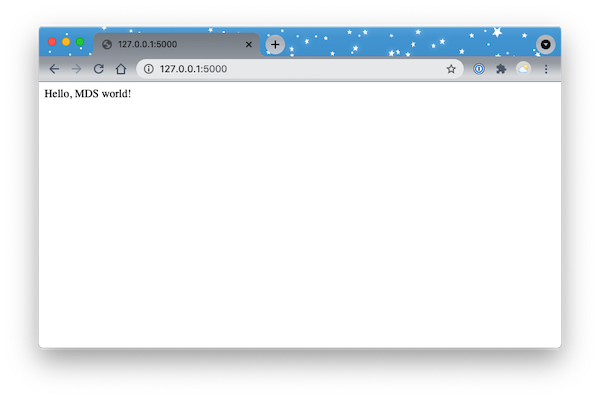

So what just happened there? We launched a simple server on our local computer to serve our app. The first two lines import and instantiate the `Flask` class. Then, the `@app.route()` decorator is used to bind a Python function to a URL - when someone accesses that URL, our function will be executed. Our home URL is specified with a backtick: `@app.route("/")`. But we can add another URL now:
1. Shut down your server by pressing `Ctrl + C`.
2. Add a new route to `app.py` using the following Python code:

```python
@app.route("/fashion")
def fashion():
    return "I think you'd look great in a bow tie."
```

3. Re-launch your server and open your app in the browser. The home page should be the same, but now try appending `/fashion` to the URL in your browser. You should see this:

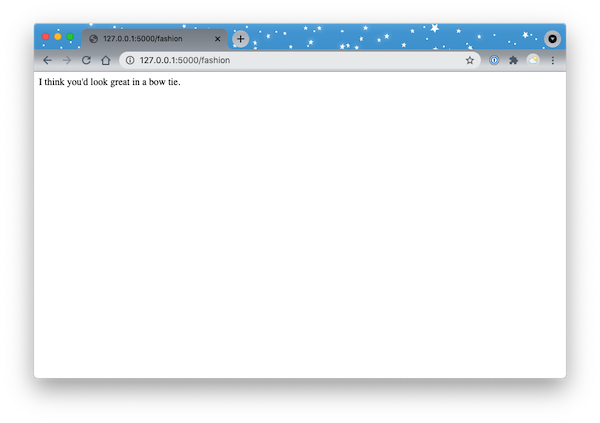

Hopefully you can start to see where we're going with this and how easy it is to use Python code to develop a web service with Flask. Let's walk through one more example where we actually send data to our server (via a POST request) and have it process that data and send something back to us. We'll be sending and receiving data in JSON format.

1. Add the following Python code to `app.py` (you can delete the `/fashion` route now but keep the home `/` route):

```python
from flask import request, jsonify

@app.route("/predict", methods=["POST"])
def predict():
    content = request.json  # this extracts the JSON content we sent
                            # Flask creates the request object automatically when handling a request
    name = content["name"]  # this extracts the name attribute from the JSON content
    results = {"Input": name,
               "Output": f"Hi there, {name}!"}  # a dictionary of things we want to return
    return jsonify(results)  # jsonify formats the dictionary into JSON to send back
```

2. Start up your server again.
3. As you can see, the endpoint we just created now accepts POST requests, so we can send it some data. We'll use `curl` from the command line to send our request. Simply type the following in a terminal (using your own name!):

```console
curl -X POST http://127.0.0.1:5000/predict -d '{"name":"Tom"}' -H "Content-Type: application/json"
```

As you're coding, you may find it useful to [turn on debugging mode](https://flask.palletsprojects.com/en/1.1.x/quickstart/#debug-mode), which, amongst other things, will auto-refresh your code as you make changes.

Once your simple API is created, you should test that it works using `curl` as we did earlier.

## Next steps (Additional Readings)

- Request validation and [error handling](https://flask.palletsprojects.com/en/1.1.x/errorhandling/)
- Developing a web-app by incorporating [HTML, CSS, templates](https://flask.palletsprojects.com/en/1.1.x/tutorial/templates/), etc.
- Putting into [production mode](https://flask.palletsprojects.com/en/1.1.x/tutorial/deploy/)